## Vendanu Assignment

>Submitted By       : ***Naveed Jeddy***<br>
>Date of Submission : ***04-August-2019***<br>
>Batch              : ***September - 2018***<br>        

### Problem Statement

Assume we are a mail-delivery book startup. You fill out a profile with us about your book preferences, and we will send you 5 books each month for free. Whatever you like you keep and pay for, and whatever you don't like you send back.

As a company we have to buy our books ahead of time. We took out a loan last month to buy our original batch of books. The value of the loan was the total cost of all the books that we bought. We made some money back through customers buying our books last month. Next month, we know which books we will be sending to which customers, but we do not know who will buy what books. It costs 0.60/book each way for shipping books to and from customers. 

The question for you to answer is:

***`Will we be able to both pay back our loan and afford our next book purchase order?`***



### Import Libraries<br>

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scikit learn libraries.
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# PCA Analysis Libraries.
from sklearn.decomposition import PCA

#Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Step 1: Reading and Understanding the Data

In [3]:
## Read the data - original_purchase_order
original_po = pd.read_csv("original_purchase_order.csv")



In [4]:
## Original - shape and Info
original_po.shape
original_po.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
product_id            1000 non-null int64
quantity_purchased    1000 non-null int64
cost_to_buy           1000 non-null float64
retail_value          1000 non-null float64
dtypes: float64(2), int64(2)
memory usage: 31.3 KB


In [5]:
## Original - Check head
original_po.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1769808,77,2.20,16.67
1,1896283,67,1.46,9.59
2,1889979,80,2.06,13.36
3,1341288,85,1.25,6.57
4,1666328,60,1.51,10.49


In [6]:
## Read the data - next_purchase_order
next_po = pd.read_csv("next_purchase_order.csv")
next_po_base = pd.read_csv("next_purchase_order.csv")


In [7]:
## next_po - shape and Info
next_po.shape
next_po.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
product_id            300 non-null int64
quantity_purchased    300 non-null int64
cost_to_buy           300 non-null float64
retail_value          300 non-null float64
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [8]:
## Original - Check head
next_po.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1479507,39,1.82,12.68
1,1681385,55,1.73,12.88
2,1771749,37,1.26,10.38
3,1605149,49,1.47,11.27
4,1861356,34,1.98,10.41


In [9]:
## Read the data - customer_features
customer = pd.read_csv("customer_features.csv")



In [10]:
## customer - shape and Info
customer.shape
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
customer_id              12000 non-null int64
age_bucket               11500 non-null object
is_returning_customer    12000 non-null bool
favorite_genres          12000 non-null object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.0+ KB


In [11]:
## customer - Check head
customer.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',..."
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B..."
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps..."
3,1000423,26-35,True,"['Classic', 'Drama']"
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi..."


In [12]:
## Read the data - product_features
product = pd.read_csv("product_features.csv")



In [13]:
## product - shape and Info
product.shape
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
product_id    1000 non-null int64
length        1000 non-null int64
difficulty    1000 non-null int64
fiction       1000 non-null bool
genre         1000 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 32.3+ KB


In [14]:
## product - Check head
product.head()

,product_id,length,difficulty,fiction,genre
0,1769808,148,3,False,Self-Help
1,1896283,161,5,False,Biography
2,1889979,296,4,False,History
3,1341288,551,4,True,Thriller
4,1666328,623,-1,True,Sci-Fi


In [15]:
## Read the data - last_month_assortment:
last_month_asmnt = pd.read_csv("last_month_assortment.csv")



In [16]:
## last_month_asmnt - shape and Info
last_month_asmnt.shape
last_month_asmnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 3 columns):
customer_id    36000 non-null int64
product_id     36000 non-null int64
purchased      36000 non-null bool
dtypes: bool(1), int64(2)
memory usage: 597.7 KB


In [17]:
## last_month_asmnt - Check head
last_month_asmnt.head()

,customer_id,product_id,purchased
0,1000078,1730073,False
1,1000078,1470520,False
2,1000078,1861356,False
3,1000078,1240824,True
4,1000078,1155460,False


In [18]:
## Read the data - next_month_assortment
next_month_asmnt = pd.read_csv("next_month_assortment.csv")



In [19]:
## next_month_asmnt - shape and Info
next_month_asmnt.shape
next_month_asmnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56400 entries, 0 to 56399
Data columns (total 2 columns):
customer_id    56400 non-null int64
product_id     56400 non-null int64
dtypes: int64(2)
memory usage: 881.3 KB


In [20]:
## next_month_asmnt - Check head
next_month_asmnt.head()

,customer_id,product_id
0,1600785,1443029
1,1600785,1164138
2,1600785,1636511
3,1600785,1832547
4,1600785,1237420


#### **Observations**<br>
> - There are `1000 rows` and `4 columns` in the original purchase order which implies 1000 books were originally purchased.<br>
> - There are `300 rows` and `4 columns` in the original purchase order which implies 300 books are been scheduled to be purchased next month.<br>
> - There are `12000 rows` and `4 columns` in the customer data which implies there are 12000 registered Customers.<br>
> - There are `1000 rows` and `5 columns` in the product list which implies that all 1000 books purchased originally have some 4 features associated with the book.<br>
> - There are `36000 rows` and `3 columns` in the last month assortment order which implies 36000 books were sent approximately 3 books been sent per Customer but beed to analyze further in the next steps.<br>
> - There are `54400 rows` and `2 columns` in the next assortment order.<br>


## Step 2: Data Cleaning and Preparation

#### Checking for null values in all the datasets.....we know already the data of the first 4 datasets are unique i.e. the books purchased, to be purchased, customer and products are Unique


In [21]:
original_po.isnull().sum()


product_id            0
quantity_purchased    0
cost_to_buy           0
retail_value          0
dtype: int64

In [22]:
next_po.isnull().sum()

product_id            0
quantity_purchased    0
cost_to_buy           0
retail_value          0
dtype: int64

In [23]:
customer.isnull().sum()

customer_id                0
age_bucket               500
is_returning_customer      0
favorite_genres            0
dtype: int64

> We notice that `age_bucket` column has some 500 Nulls...lets fill this Null values as  `NA` 

In [24]:
#Impute Blanks  of `age_bucket column in customer `to 'unknown'.

customer.loc[(customer['age_bucket'].isnull()),'age_bucket'] = 'unknown'

In [25]:
## Re-checking in Customer for any Nulls
customer.isnull().sum()

customer_id              0
age_bucket               0
is_returning_customer    0
favorite_genres          0
dtype: int64

> No more Nulls in the `age_bucket` column of customer dataset

In [26]:
product.isnull().sum()

product_id    0
length        0
difficulty    0
fiction       0
genre         0
dtype: int64

In [27]:
last_month_asmnt.isnull().sum()

customer_id    0
product_id     0
purchased      0
dtype: int64

In [28]:
next_month_asmnt.isnull().sum()

customer_id    0
product_id     0
dtype: int64

In [29]:
# Create loan_amount column in original_po
original_po['loan_amt'] = original_po.quantity_purchased * original_po.cost_to_buy
original_po.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,loan_amt
0,1769808,77,2.20,16.67,169.40
1,1896283,67,1.46,9.59,97.82
2,1889979,80,2.06,13.36,164.80
3,1341288,85,1.25,6.57,106.25
4,1666328,60,1.51,10.49,90.60


In [30]:
# Create loan_amount column in next_po
next_po['loan_amt'] = next_po.quantity_purchased * next_po.cost_to_buy
next_po.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,loan_amt
0,1479507,39,1.82,12.68,70.98
1,1681385,55,1.73,12.88,95.15
2,1771749,37,1.26,10.38,46.62
3,1605149,49,1.47,11.27,72.03
4,1861356,34,1.98,10.41,67.32


In [31]:
## Let's merge original_po with product 
original_po_product = pd.merge(original_po, product, how='inner', on='product_id')
original_po_product.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,loan_amt,length,difficulty,fiction,genre
0,1769808,77,2.20,16.67,169.40,148,3,False,Self-Help
1,1896283,67,1.46,9.59,97.82,161,5,False,Biography
2,1889979,80,2.06,13.36,164.80,296,4,False,History
3,1341288,85,1.25,6.57,106.25,551,4,True,Thriller
4,1666328,60,1.51,10.49,90.60,623,-1,True,Sci-Fi


In [32]:
original_po_product.shape

(1000, 9)

> The dataframe `original_po_product` gives the original purchase order detailing the type of books purchase originally with additional information fetaures of the book.

> Similarly let's merge `next_po` with `product` 

In [33]:
## Let's merge next_po with product 

next_po_product = pd.merge(next_po, product, how='left', on='product_id')
next_po_product.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,loan_amt,length,difficulty,fiction,genre
0,1479507,39,1.82,12.68,70.98,287,5,True,Classic
1,1681385,55,1.73,12.88,95.15,513,4,True,Romance
2,1771749,37,1.26,10.38,46.62,856,-1,True,Sci-Fi
3,1605149,49,1.47,11.27,72.03,327,4,True,Drama
4,1861356,34,1.98,10.41,67.32,156,-1,True,Thriller


In [34]:
next_po_product.shape

(300, 9)

> The dataframe `next_po_product` gives the next purchase order detailing the type of books to be purchased  with additional information fetaures of the book.

#Split text with the separator ','
customer['favorite_genres_list'] = customer['favorite_genres'].apply(lambda x: x.split(','))
print(customer['favorite_genres_list'])


In [35]:
customer['genres_list'] = customer['favorite_genres']
#print(customer['genres_list'])

In [36]:
customer['genres_list'] = customer['genres_list'].str.replace("'","")
#print(customer['genres_list'])

In [37]:
unique_genre  = product['genre'].unique()
#print(unique_genre)

In [38]:
#Convert set to list:
#genres_unq = list(genres_unq)
genres_matrix = [ [1 if genre in row else 0 for genre in unique_genre] for row in customer['genres_list']  ]
#print(genres_matrix)

In [39]:
customer = pd.concat([customer, pd.DataFrame(genres_matrix,columns=unique_genre)],axis=1)
customer.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres,genres_list,Self-Help,Biography,History,Thriller,Sci-Fi,Romance,Pop-Psychology,Beach-Read,Drama,Classic,Pop-Sci
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',...","[Classic, History, Self-Help, Romance, Thrille...",1,0,1,1,1,1,1,1,0,1,1
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B...","[Beach-Read, Pop-Sci, Pop-Psychology, Biograph...",1,1,0,0,1,0,1,1,1,0,1
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps...","[Romance, Self-Help, Beach-Read, Pop-Psychology]",1,0,0,0,0,1,1,1,0,0,0
3,1000423,26-35,True,"['Classic', 'Drama']","[Classic, Drama]",0,0,0,0,0,0,0,0,1,1,0
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi...","[Drama, Thriller, Sci-Fi, Romance, History, Be...",0,1,1,1,1,1,0,1,1,0,0


In [40]:
age_unique  = customer['age_bucket'].unique()
#print(age_unique)

In [41]:
#Convert set to list:
#genres_unq = list(genres_unq)
age_matrix = [ [1 if age in row else 0 for age in age_unique] for row in customer['age_bucket']  ]
#print(age_matrix)

In [42]:
customer = pd.concat([customer, pd.DataFrame(age_matrix,columns=age_unique)],axis=1)
customer.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres,genres_list,Self-Help,Biography,History,Thriller,Sci-Fi,...,Classic,Pop-Sci,46-55,26-35,66+,18-25,56-65,36-45,unknown,0-17
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',...","[Classic, History, Self-Help, Romance, Thrille...",1,0,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B...","[Beach-Read, Pop-Sci, Pop-Psychology, Biograph...",1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps...","[Romance, Self-Help, Beach-Read, Pop-Psychology]",1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1000423,26-35,True,"['Classic', 'Drama']","[Classic, Drama]",0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi...","[Drama, Thriller, Sci-Fi, Romance, History, Be...",0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [43]:
col_rename = {'46-55'                                  : 'Age_46-55', 
              '26-35'                                  : 'Age_26-35', 
              '66+'                                  : 'Age_66+',
              '18-25'                                  : 'Age_18-25',
              '56-65'                                 : 'Age_56-65',
              '36-45'                                  : 'Age_36-45',
              'unknown'                  : 'Age_unknown',
              '0-17'                         : 'Age_0-17'
             }
# Rename the columns
customer.rename(columns=col_rename,inplace=True)
customer.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres,genres_list,Self-Help,Biography,History,Thriller,Sci-Fi,...,Classic,Pop-Sci,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',...","[Classic, History, Self-Help, Romance, Thrille...",1,0,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B...","[Beach-Read, Pop-Sci, Pop-Psychology, Biograph...",1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps...","[Romance, Self-Help, Beach-Read, Pop-Psychology]",1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1000423,26-35,True,"['Classic', 'Drama']","[Classic, Drama]",0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi...","[Drama, Thriller, Sci-Fi, Romance, History, Be...",0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [44]:
return_unique  = customer['is_returning_customer'].unique()
#print(return_unique)

In [45]:
# replace True of False of `is_returning_customer` in Customer as 1/0
customer.is_returning_customer = customer.is_returning_customer.astype(int)
customer.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres,genres_list,Self-Help,Biography,History,Thriller,Sci-Fi,...,Classic,Pop-Sci,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17
0,1000078,46-55,1,"['Classic', 'History', 'Self-Help', 'Romance',...","[Classic, History, Self-Help, Romance, Thrille...",1,0,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,1000102,46-55,1,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B...","[Beach-Read, Pop-Sci, Pop-Psychology, Biograph...",1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,1000185,46-55,1,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps...","[Romance, Self-Help, Beach-Read, Pop-Psychology]",1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1000423,26-35,1,"['Classic', 'Drama']","[Classic, Drama]",0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1000696,66+,1,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi...","[Drama, Thriller, Sci-Fi, Romance, History, Be...",0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [46]:
# Drop non-numeric columns.
colNames = ['age_bucket',
            'favorite_genres',
            'genres_list'
           ]
customer = customer.drop(columns=colNames,axis=1)
customer.head()

,customer_id,is_returning_customer,Self-Help,Biography,History,Thriller,Sci-Fi,Romance,Pop-Psychology,Beach-Read,...,Classic,Pop-Sci,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17
0,1000078,1,1,0,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,1000102,1,1,1,0,0,1,0,1,1,...,0,1,1,0,0,0,0,0,0,0
2,1000185,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,1000423,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1000696,1,0,1,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


> Have Converted all features of Customers into Numeric variables which doesn't require any scaling

In [47]:
# replace True of False of `purchased` in ast_month_asmnt as 1/0
last_month_asmnt.purchased = last_month_asmnt.purchased.astype(int)
last_month_asmnt.head()

,customer_id,product_id,purchased
0,1000078,1730073,0
1,1000078,1470520,0
2,1000078,1861356,0
3,1000078,1240824,1
4,1000078,1155460,0


In [48]:
# Dummies for Genre. - Product
dummy_genre = pd.get_dummies(product['genre'],prefix='genre',drop_first=True)

In [49]:
#Add the results to the product features
product = pd.concat([product,dummy_genre], axis = 1)
product.head()

,product_id,length,difficulty,fiction,genre,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,genre_Romance,genre_Sci-Fi,genre_Self-Help,genre_Thriller
0,1769808,148,3,False,Self-Help,0,0,0,0,0,0,0,0,1,0
1,1896283,161,5,False,Biography,1,0,0,0,0,0,0,0,0,0
2,1889979,296,4,False,History,0,0,0,1,0,0,0,0,0,0
3,1341288,551,4,True,Thriller,0,0,0,0,0,0,0,0,0,1
4,1666328,623,-1,True,Sci-Fi,0,0,0,0,0,0,0,1,0,0


In [50]:
# drop the original `genre`columns as we have created the dummies.
product.drop(['genre'], axis = 1, inplace = True)
product.head()

,product_id,length,difficulty,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,genre_Romance,genre_Sci-Fi,genre_Self-Help,genre_Thriller
0,1769808,148,3,False,0,0,0,0,0,0,0,0,1,0
1,1896283,161,5,False,1,0,0,0,0,0,0,0,0,0
2,1889979,296,4,False,0,0,0,1,0,0,0,0,0,0
3,1341288,551,4,True,0,0,0,0,0,0,0,0,0,1
4,1666328,623,-1,True,0,0,0,0,0,0,0,1,0,0


In [51]:
# replace True of False of `fiction` in product as 1/0
product.fiction = product.fiction.astype(int)
product.head()

,product_id,length,difficulty,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,genre_Romance,genre_Sci-Fi,genre_Self-Help,genre_Thriller
0,1769808,148,3,0,0,0,0,0,0,0,0,0,1,0
1,1896283,161,5,0,1,0,0,0,0,0,0,0,0,0
2,1889979,296,4,0,0,0,0,1,0,0,0,0,0,0
3,1341288,551,4,1,0,0,0,0,0,0,0,0,0,1
4,1666328,623,-1,1,0,0,0,0,0,0,0,1,0,0


In [52]:
## Let's merge last_month_asmnt with Product

last_asmnt_order = pd.merge(last_month_asmnt, product, how='left', on='product_id')
last_asmnt_order.head()

,customer_id,product_id,purchased,length,difficulty,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,genre_Romance,genre_Sci-Fi,genre_Self-Help,genre_Thriller
0,1000078,1730073,0,219,4,1,0,0,1,0,0,0,0,0,0,0
1,1000078,1470520,0,934,5,1,0,0,0,0,0,0,1,0,0,0
2,1000078,1861356,0,156,-1,1,0,0,0,0,0,0,0,0,0,1
3,1000078,1240824,1,454,1,1,0,1,0,0,0,0,0,0,0,0
4,1000078,1155460,0,910,1,1,0,0,0,0,0,0,0,0,0,1


In [53]:
last_asmnt_order.shape

(36000, 16)

In [54]:
customer.head()

,customer_id,is_returning_customer,Self-Help,Biography,History,Thriller,Sci-Fi,Romance,Pop-Psychology,Beach-Read,...,Classic,Pop-Sci,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17
0,1000078,1,1,0,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,1000102,1,1,1,0,0,1,0,1,1,...,0,1,1,0,0,0,0,0,0,0
2,1000185,1,1,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,1000423,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1000696,1,0,1,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [55]:
## Let's merge last_asmnt_order_asmnt with customer 

last_po = pd.merge(last_asmnt_order, customer, how='left', on='customer_id')
last_po.head()

,customer_id,product_id,purchased,length,difficulty,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,...,Classic,Pop-Sci,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17
0,1000078,1730073,0,219,4,1,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
1,1000078,1470520,0,934,5,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,1000078,1861356,0,156,-1,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,1000078,1240824,1,454,1,1,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
4,1000078,1155460,0,910,1,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [56]:
last_po.shape

(36000, 36)

In [57]:
last_po.columns

Index(['customer_id', 'product_id', 'purchased', 'length', 'difficulty',
       'fiction', 'genre_Biography', 'genre_Classic', 'genre_Drama',
       'genre_History', 'genre_Pop-Psychology', 'genre_Pop-Sci',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Self-Help', 'genre_Thriller',
       'is_returning_customer', 'Self-Help', 'Biography', 'History',
       'Thriller', 'Sci-Fi', 'Romance', 'Pop-Psychology', 'Beach-Read',
       'Drama', 'Classic', 'Pop-Sci', 'Age_46-55', 'Age_26-35', 'Age_66+',
       'Age_18-25', 'Age_56-65', 'Age_36-45', 'Age_unknown', 'Age_0-17'],
      dtype='object')

In [58]:
## Let's merge next_month_asmnt with Product

next_asmnt_order = pd.merge(next_month_asmnt, product, how='left', on='product_id')
next_asmnt_order.head()

,customer_id,product_id,length,difficulty,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,genre_Romance,genre_Sci-Fi,genre_Self-Help,genre_Thriller
0,1600785,1443029,266,1,1,0,0,0,0,0,0,0,1,0,0
1,1600785,1164138,749,2,1,0,0,0,0,0,0,0,1,0,0
2,1600785,1636511,278,1,1,0,0,1,0,0,0,0,0,0,0
3,1600785,1832547,268,2,1,0,0,0,0,0,0,0,0,0,0
4,1600785,1237420,371,5,0,0,0,0,0,0,0,0,0,1,0


In [59]:
next_asmnt_order.isnull().sum()

customer_id             0
product_id              0
length                  0
difficulty              0
fiction                 0
genre_Biography         0
genre_Classic           0
genre_Drama             0
genre_History           0
genre_Pop-Psychology    0
genre_Pop-Sci           0
genre_Romance           0
genre_Sci-Fi            0
genre_Self-Help         0
genre_Thriller          0
dtype: int64

In [60]:
next_asmnt_order.shape

(56400, 15)

In [61]:
## Let's merge next_asmnt_order_asmnt with customer 

next_po = pd.merge(next_asmnt_order, customer, how='left', on='customer_id')
next_po.head()

,customer_id,product_id,length,difficulty,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,...,Classic,Pop-Sci,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17
0,1600785,1443029,266,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
1,1600785,1164138,749,2,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,1600785,1636511,278,1,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
3,1600785,1832547,268,2,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,1600785,1237420,371,5,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [62]:
next_po.shape

(56400, 35)

In [63]:
next_po.columns

Index(['customer_id', 'product_id', 'length', 'difficulty', 'fiction',
       'genre_Biography', 'genre_Classic', 'genre_Drama', 'genre_History',
       'genre_Pop-Psychology', 'genre_Pop-Sci', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Self-Help', 'genre_Thriller',
       'is_returning_customer', 'Self-Help', 'Biography', 'History',
       'Thriller', 'Sci-Fi', 'Romance', 'Pop-Psychology', 'Beach-Read',
       'Drama', 'Classic', 'Pop-Sci', 'Age_46-55', 'Age_26-35', 'Age_66+',
       'Age_18-25', 'Age_56-65', 'Age_36-45', 'Age_unknown', 'Age_0-17'],
      dtype='object')

## Step 3 - Data Exploration

### Step 3.1:  Univariate analysis

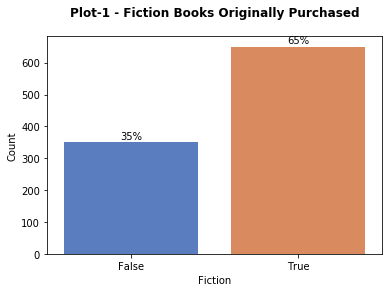

In [64]:
# Analyse visually what sort of books were purchases

# Univariate Analysis - Plot -1 - Fiction or not
#
f, ax = plt.subplots(figsize=(6, 4))
ax =sns.countplot(x="fiction",data = original_po_product,palette='muted')
Title='Plot-1 - Fiction Books Originally Purchased'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Fiction")
ax.set_ylabel("Count")

#Annotations.
total = float(len(original_po_product))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{0:.0%}'.format(height/total),
            ha="center") 
        
plt.show();

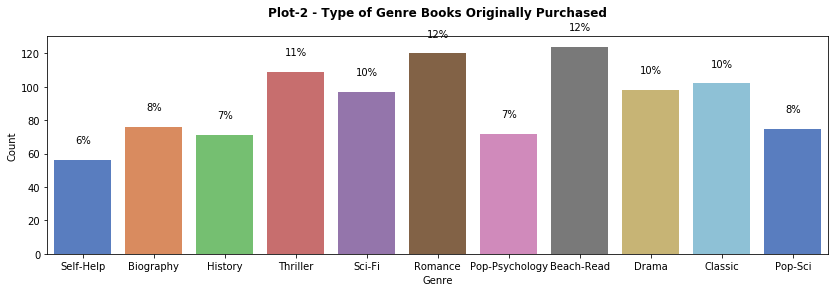

In [65]:
# Analyse visually what sort of books were purchases

# Univariate Analysis - Plot -1 - Genre Classification
#
f, ax = plt.subplots(figsize=(14, 4))
ax =sns.countplot(x="genre",data = original_po_product,palette='muted')
Title='Plot-2 - Type of Genre Books Originally Purchased'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Genre")
ax.set_ylabel("Count")

#Annotations.
total = float(len(original_po_product))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{0:.0%}'.format(height/total),
            ha="center") 
        
plt.show();

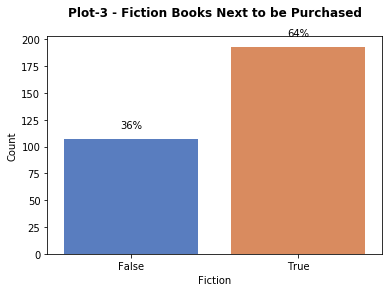

In [66]:
# Analyse visually what sort of books were purchases

# Univariate Analysis - Plot -3 - Fiction or not _ next po
#
f, ax = plt.subplots(figsize=(6, 4))
ax =sns.countplot(x="fiction",data = next_po_product,palette='muted')
Title='Plot-3 - Fiction Books Next to be Purchased'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Fiction")
ax.set_ylabel("Count")

#Annotations.
total = float(len(next_po_product))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{0:.0%}'.format(height/total),
            ha="center") 
        
plt.show();

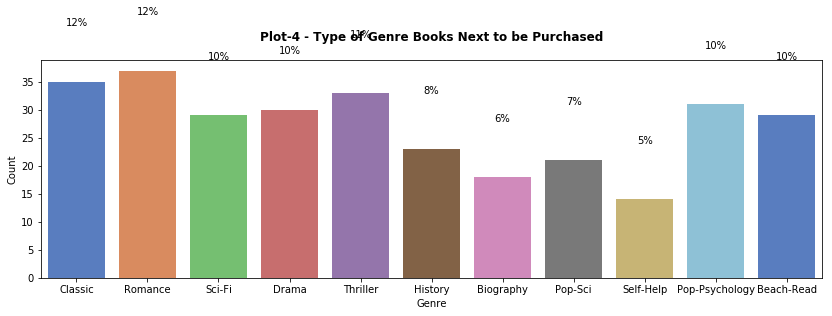

In [67]:
# Analyse visually what sort of books were purchases

# Univariate Analysis - Plot -1 - Genre Classification
#
f, ax = plt.subplots(figsize=(14, 4))
ax =sns.countplot(x="genre",data = next_po_product,palette='muted')
Title='Plot-4 - Type of Genre Books Next to be Purchased'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Genre")
ax.set_ylabel("Count")

#Annotations.
total = float(len(next_po_product))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{0:.0%}'.format(height/total),
            ha="center") 
        
plt.show();

> There are 11 types of Genre's

> We noe have TRAIN and TEST dataset setup with equal columns minus `purchased` column in TEST which needs to be Predicted by the Model

> The Numerical values columns quantity_purchased, cost_to_buy, retail_value, length, difficulty appear to be normally distributed and there are no any Outliers

## STEP 5: Scaling for Numeric Variables

In [68]:
# Normalising Numerical features
last_norm = last_po[['length','difficulty']]

In [69]:
last_norm.shape

(36000, 2)

In [70]:
last_norm=(last_norm-last_norm.mean())/last_norm.std()

In [71]:
# Drop the original numerical columns from original_po_train.

last_po.drop(columns=['length','difficulty'],axis=1,inplace=True)

In [72]:
# merge original_po_train and original_norm together.
last_po = pd.concat([last_po,last_norm],axis=1)
last_po.head()

,customer_id,product_id,purchased,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,...,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17,length,difficulty
0,1000078,1730073,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,-0.228940,0.761956
1,1000078,1470520,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.225633,1.343552
2,1000078,1861356,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.229232,-2.146025
3,1000078,1240824,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.227853,-0.982833
4,1000078,1155460,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.225744,-0.982833


last_po.shape

In [73]:
# Normalising Numerical features - TEST
next_norm = next_po[['length','difficulty']]

In [74]:
next_norm.shape

(56400, 2)

In [75]:
next_norm=(next_norm-next_norm.mean())/next_norm.std()

In [76]:
# Drop the original numerical columns from original_po_train.

next_po.drop(columns=['length','difficulty'],axis=1,inplace=True)

In [77]:
# merge next_po_test and next_norm together.
next_po = pd.concat([next_po,next_norm],axis=1)
next_po.head()

,customer_id,product_id,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,genre_Romance,...,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17,length,difficulty
0,1600785,1443029,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.233740,-0.982025
1,1600785,1164138,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.231549,-0.399938
2,1600785,1636511,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.233686,-0.982025
3,1600785,1832547,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.233731,-0.399938
4,1600785,1237420,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.233264,1.346325


In [78]:
next_po.shape

(56400, 35)

In [79]:
last_po.purchased.value_counts()

0    23321
1    12679
Name: purchased, dtype: int64

> Now we have both TRAIN and TEST dataset ready

## Feature Selection Using RFE

## Step 7 : Model Building ( PCA Model)

In [80]:
# Putting feature variable to X
X = last_po.drop(['customer_id','product_id','purchased'],axis=1)#

# Putting response variable `purchased` to y

y = last_po['purchased']
 
X.shape

(36000, 33)

In [81]:
## For TEST
# Putting feature variable to X_test
X_test = next_po.drop(['customer_id','product_id'],axis=1)#

# Putting response variable `purchased` to y

#y = last_po['purchased']
 
X_test.shape

(56400, 33)

In [82]:
#RFE Model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [83]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X, y)

In [84]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('fiction', True, 1),
 ('genre_Biography', True, 1),
 ('genre_Classic', True, 1),
 ('genre_Drama', True, 1),
 ('genre_History', True, 1),
 ('genre_Pop-Psychology', True, 1),
 ('genre_Pop-Sci', False, 6),
 ('genre_Romance', False, 4),
 ('genre_Sci-Fi', True, 1),
 ('genre_Self-Help', True, 1),
 ('genre_Thriller', True, 1),
 ('is_returning_customer', True, 1),
 ('Self-Help', False, 5),
 ('Biography', False, 17),
 ('History', True, 1),
 ('Thriller', False, 11),
 ('Sci-Fi', False, 14),
 ('Romance', False, 18),
 ('Pop-Psychology', False, 7),
 ('Beach-Read', False, 15),
 ('Drama', False, 2),
 ('Classic', False, 10),
 ('Pop-Sci', False, 9),
 ('Age_46-55', False, 19),
 ('Age_26-35', False, 13),
 ('Age_66+', True, 1),
 ('Age_18-25', True, 1),
 ('Age_56-65', False, 12),
 ('Age_36-45', False, 8),
 ('Age_unknown', True, 1),
 ('Age_0-17', True, 1),
 ('length', False, 16),
 ('difficulty', False, 3)]

In [85]:
col = X.columns[rfe.support_]

### Assessing the model with StatsModels

In [86]:
#Stats Model

X_sm = sm.add_constant(X[col])
logm2 = sm.GLM(y,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              purchased   No. Observations:                36000
Model:                            GLM   Df Residuals:                    35984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22605.
Date:                Mon, 05 Aug 2019   Deviance:                       45211.
Time:                        14:20:16   Pearson chi2:                 3.60e+04
No. Iterations:                     4   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2583      0.048    -26.194      0.000      -1.352      -1.164
fiction                   0.4634      0.047      9.763      0.000       0.370       0.556
genre_Biography          -0.1301      0.060     -2.169      0.030      -0.248      -0.013
genre_Classic            -0.2366      0.041     -5.770      0.000      -0.317      -0.156
genre_Drama               0.1097      0.040      2.717      0.007       0.031       0.189
genre_History            -0.1983      0.062     -3.216      0.001      -0.319      -0.077
genre_Pop-Psychology     -0.3204      0.062     -5.175      0.000      -0.442      -0.199
genre_Sci-Fi             -0.3194      0.042     -7.542      0.000      -0.402      -0.236
genre_Self-Help          -0.4008      0.068     -5.922      0.000      -0.534      -0.268
genre_Thriller           -0.1904      0.040     -4.757      0.000      -0.269      -0.112
is_returning_customer     0.6539      0.026     25.179      0.000       0.603       0.705
History                   0.1324      0.023      5.861      0.000       0.088       0.177
Age_66+                  -0.1848      0.033     -5.566      0.000      -0.250      -0.120
Age_18-25                -0.3338      0.040     -8.424      0.000      -0.412      -0.256
Age_unknown              -0.1466      0.056     -2.614      0.009      -0.257      -0.037
Age_0-17                 -0.5013      0.135     -3.709      0.000      -0.766      -0.236
=========================================================================================
"""

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.94
1,fiction,3.98
2,genre_Biography,1.86
6,genre_Pop-Psychology,1.83
5,genre_History,1.80
8,genre_Self-Help,1.65
9,genre_Thriller,1.29
3,genre_Classic,1.28
4,genre_Drama,1.27
7,genre_Sci-Fi,1.26


In [89]:
# drop the high VIF variable fiction
X2 = X_sm.drop(['fiction'], axis = 1)


In [90]:
#Stats Model

X_sm3 = sm.add_constant(X2)
logm3 = sm.GLM(y,X_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              purchased   No. Observations:                36000
Model:                            GLM   Df Residuals:                    35985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22654.
Date:                Mon, 05 Aug 2019   Deviance:                       45309.
Time:                        14:20:16   Pearson chi2:                 3.60e+04
No. Iterations:                     4   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8978      0.030    -30.072      0.000      -0.956      -0.839
genre_Biography          -0.4891      0.047    -10.422      0.000      -0.581      -0.397
genre_Classic            -0.1321      0.040     -3.330      0.001      -0.210      -0.054
genre_Drama               0.2141      0.039      5.484      0.000       0.138       0.291
genre_History            -0.5573      0.049    -11.352      0.000      -0.653      -0.461
genre_Pop-Psychology     -0.6793      0.049    -13.755      0.000      -0.776      -0.583
genre_Sci-Fi             -0.2149      0.041     -5.233      0.000      -0.295      -0.134
genre_Self-Help          -0.7598      0.056    -13.456      0.000      -0.870      -0.649
genre_Thriller           -0.0860      0.039     -2.223      0.026      -0.162      -0.010
is_returning_customer     0.6536      0.026     25.204      0.000       0.603       0.704
History                   0.1296      0.023      5.745      0.000       0.085       0.174
Age_66+                  -0.1844      0.033     -5.563      0.000      -0.249      -0.119
Age_18-25                -0.3357      0.040     -8.483      0.000      -0.413      -0.258
Age_unknown              -0.1466      0.056     -2.617      0.009      -0.256      -0.037
Age_0-17                 -0.4902      0.135     -3.634      0.000      -0.755      -0.226
=========================================================================================
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_sm3.values, i) for i in range(X_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.70
8,genre_Thriller,1.20
2,genre_Classic,1.19
3,genre_Drama,1.18
6,genre_Sci-Fi,1.18
1,genre_Biography,1.15
4,genre_History,1.14
5,genre_Pop-Psychology,1.14
7,genre_Self-Help,1.11
11,Age_66+,1.03


### Extract the Features and Coefficient from the Final RFE Model

In [92]:
res_dict = dict(res.params)
res_coef = pd.DataFrame(list(res_dict.items()), columns=['Features', 'Coefficients'])
res_coef

,Features,Coefficients
0,const,-0.897768
1,genre_Biography,-0.489117
2,genre_Classic,-0.132109
3,genre_Drama,0.214145
4,genre_History,-0.557266
5,genre_Pop-Psychology,-0.679349
6,genre_Sci-Fi,-0.214912
7,genre_Self-Help,-0.759761
8,genre_Thriller,-0.085971
9,is_returning_customer,0.653628


In [93]:
res_coef.reindex(res_coef['Coefficients'].abs().sort_values(ascending=False).index)

,Features,Coefficients
0,const,-0.897768
7,genre_Self-Help,-0.759761
5,genre_Pop-Psychology,-0.679349
9,is_returning_customer,0.653628
4,genre_History,-0.557266
14,Age_0-17,-0.490235
1,genre_Biography,-0.489117
12,Age_18-25,-0.335718
6,genre_Sci-Fi,-0.214912
3,genre_Drama,0.214145


### Make Prediction based on RFE Model

In [94]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_sm3)

In [95]:
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52488448, 0.47140005, 0.4500432 , 0.43865211, 0.4500432 ,
       0.38721082, 0.43926639, 0.43926639, 0.40703184, 0.49250185])

In [96]:
y_train_pred_final = pd.DataFrame({'purchased':y.values, 'purchased_Prob':y_train_pred})
y_train_pred_final['ID'] = y.index#

In [97]:
#Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.purchased_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,purchased,purchased_Prob,ID,predicted
0,0,0.524884,0,1
1,0,0.471400,1,0
2,0,0.450043,2,0
3,1,0.438652,3,0
4,0,0.450043,4,0


In [98]:
# Let's check the overall accuracy.
#print(metrics.accuracy_score(y_train_pred_final.purchased, y_train_pred_final.predicted))

### Step 9.5: Model Evaluation

In [99]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.purchased, y_train_pred_final.predicted )
confusion

array([[22921,   400],
       [12257,   422]])

In [100]:
# Calculate scores.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity,Specifity of our logistic regression model
#print("Sensitivity    :",TP / float(TP+FN))
#print("Specificity    :",TN / float(TN+FP))
#print("False Positive Rate  :", FP/ float(TN+FP))
#print("Positive Predictive Value :", TP / float(TP+FP))
#print("Negative Predictive Value :", TN / float(TN+ FN))

In [102]:
#Plotting ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example - Train')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.purchased,
                                         y_train_pred_final.purchased_Prob, 
                                         drop_intermediate = False )

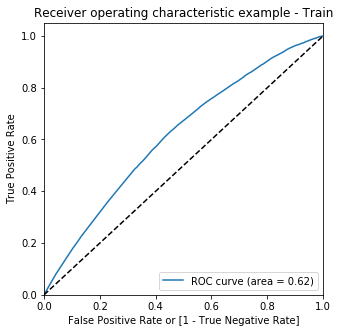

In [104]:
draw_roc(y_train_pred_final.purchased, y_train_pred_final.purchased_Prob)

####  Step 9.5.3: Calculation of Optimal Cut-off Point

 - Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [105]:
#Finding Optimual Cut-off Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.purchased_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,purchased,purchased_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.524884,0,1,1,1,1,1,1,1,0,0,0,0
1,0,0.471400,1,0,1,1,1,1,1,0,0,0,0,0
2,0,0.450043,2,0,1,1,1,1,1,0,0,0,0,0
3,1,0.438652,3,0,1,1,1,1,1,0,0,0,0,0
4,0,0.450043,4,0,1,1,1,1,1,0,0,0,0,0


In [106]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specitivity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.purchased, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
#print(cutoff_df)

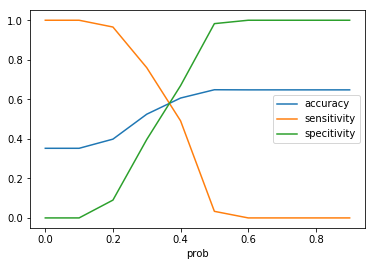

In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specitivity'])
plt.show();

In [108]:
y_train_pred_final['final_predicted'] = y_train_pred_final.purchased_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,purchased,purchased_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.524884,0,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.471400,1,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.450043,2,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.438652,3,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.450043,4,0,1,1,1,1,1,0,0,0,0,0,1


In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.purchased, y_train_pred_final.final_predicted)

0.6064166666666667

####  Recalculating Confusion matrix 

In [110]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.purchased, y_train_pred_final.final_predicted )
confusion2

array([[15604,  7717],
       [ 6452,  6227]])

In [111]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
#print("Sensitivity  :", TP2 / float(TP2+FN2))
#print("Specificity  :", TN2 / float(TN2+FP2))
#print("False Positive Rate: ", FP2/ float(TN2+FP2))
#print ("Positive Predictive Value   : ",  TP2 / float(TP2+FP2))
#print ("Negative Predictive Value   : ",  TN2 / float(TN2+ FN2))

### Making predictions on the test set i.e. next_po

In [113]:
X_test_sm = sm.add_constant(X_test)

In [114]:
#Predict
y_test_pred = res.predict(X_test_sm[X_sm3.columns])

In [115]:
y_test_pred[:10]

0    0.272284
1    0.272284
2    0.364935
3    0.316879
4    0.178299
5    0.324480
6    0.492502
7    0.439266
8    0.492502
9    0.268175
dtype: float64

In [116]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
0,0.272284
1,0.272284
2,0.364935
3,0.316879
4,0.178299


In [117]:
y_pred_1.shape

(56400, 1)

In [118]:
# Renaming the column 
y_pred_1= y_pred_1.rename(columns={ 0 : 'purchased_Prob'})
y_pred_1.head()

,purchased_Prob
0,0.272284
1,0.272284
2,0.364935
3,0.316879
4,0.178299


In [119]:
#index to a new column ID
y_pred_1['ID'] = y_pred_1.index
y_pred_1.head()

,purchased_Prob,ID
0,0.272284,0
1,0.272284,1
2,0.364935,2
3,0.316879,3
4,0.178299,4


In [120]:
y_pred_1['final_predicted'] = y_pred_1.purchased_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_1.head()

,purchased_Prob,ID,final_predicted
0,0.272284,0,0
1,0.272284,1,0
2,0.364935,2,0
3,0.316879,3,0
4,0.178299,4,0


In [121]:
y_pred_1.shape

(56400, 3)

In [122]:
original_po.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,loan_amt
0,1769808,77,2.20,16.67,169.40
1,1896283,67,1.46,9.59,97.82
2,1889979,80,2.06,13.36,164.80
3,1341288,85,1.25,6.57,106.25
4,1666328,60,1.51,10.49,90.60


In [123]:
last_po.head()

,customer_id,product_id,purchased,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,...,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17,length,difficulty
0,1000078,1730073,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,-0.228940,0.761956
1,1000078,1470520,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.225633,1.343552
2,1000078,1861356,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.229232,-2.146025
3,1000078,1240824,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.227853,-0.982833
4,1000078,1155460,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.225744,-0.982833


In [124]:
# Create variable with Product purchased
bought = last_po['purchased'] == 1

# Select all cases where nationality is USA and age is greater than 50
last_po[bought]

,customer_id,product_id,purchased,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,...,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17,length,difficulty
3,1000078,1240824,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.227853,-0.982833
7,1000102,1059918,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.226354,-0.982833
12,1000185,1448703,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.226512,-0.982833
17,1000423,1582029,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,-0.227187,-0.982833
20,1000696,1996925,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4.396688,0.180359
22,1000696,1378299,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-0.227594,1.343552
23,1000696,1341288,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-0.227405,0.761956
31,1000916,1393679,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.227270,0.761956
36,1001144,1170717,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,-0.227428,1.343552
38,1001144,1624036,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-0.226812,0.761956


In [125]:
last_bought = last_po[last_po['purchased'] == 1]
last_bought.shape

(12679, 36)

In [126]:
last_bought.head()

,customer_id,product_id,purchased,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,...,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17,length,difficulty
3,1000078,1240824,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.227853,-0.982833
7,1000102,1059918,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.226354,-0.982833
12,1000185,1448703,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.226512,-0.982833
17,1000423,1582029,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,-0.227187,-0.982833
20,1000696,1996925,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4.396688,0.180359


In [127]:
last_prod = last_bought.sort_values(by=['product_id'])
last_prod.head()

,customer_id,product_id,purchased,fiction,genre_Biography,genre_Classic,genre_Drama,genre_History,genre_Pop-Psychology,genre_Pop-Sci,...,Age_46-55,Age_26-35,Age_66+,Age_18-25,Age_56-65,Age_36-45,Age_unknown,Age_0-17,length,difficulty
7644,1126655,1003455,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.226234,0.180359
26403,1441202,1003455,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,-0.226234,0.180359
17394,1287574,1003455,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,-0.226234,0.180359
32678,1544379,1003455,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-0.226234,0.180359
29447,1490252,1003455,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-0.226234,0.180359


In [128]:
last_new = last_prod.groupby(['product_id'])['purchased'].sum()
last_new.head()

product_id
1003455     6
1004302    18
1007659    29
1008476     4
1009975     4
Name: purchased, dtype: int64

In [129]:
last_new.shape

(960,)

In [130]:
last_new = last_new.rename(columns={ 1 : 'qty_purchased'})
last_new.head()

product_id
1003455     6
1004302    18
1007659    29
1008476     4
1009975     4
dtype: int64

In [131]:
last_newp = pd.DataFrame(last_new)
last_newp.head()

,0
product_id,
1003455,6
1004302,18
1007659,29
1008476,4
1009975,4


In [132]:
last_newp = last_newp.rename(columns={ 0 : 'qty_cust_purchased'})
last_newp.head()

,qty_cust_purchased
product_id,
1003455,6
1004302,18
1007659,29
1008476,4
1009975,4


In [133]:
## Let's merge original_po with last_newp 
last_newp = pd.merge(original_po, last_newp, how='left', on='product_id')
last_newp.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,loan_amt,qty_cust_purchased
0,1769808,77,2.20,16.67,169.40,8.0
1,1896283,67,1.46,9.59,97.82,2.0
2,1889979,80,2.06,13.36,164.80,6.0
3,1341288,85,1.25,6.57,106.25,29.0
4,1666328,60,1.51,10.49,90.60,20.0


In [134]:
last_newp.shape

(1000, 6)

In [135]:
# Create Purchase_amt
last_newp['purchase_amt'] = last_newp['qty_cust_purchased'] * last_newp['retail_value']
last_newp.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,loan_amt,qty_cust_purchased,purchase_amt
0,1769808,77,2.20,16.67,169.40,8.0,133.36
1,1896283,67,1.46,9.59,97.82,2.0,19.18
2,1889979,80,2.06,13.36,164.80,6.0,80.16
3,1341288,85,1.25,6.57,106.25,29.0,190.53
4,1666328,60,1.51,10.49,90.60,20.0,209.80


In [136]:
original_loan = last_newp.loan_amt.sum()
#print(original_loan)

In [137]:
purchase_total = last_newp.purchase_amt.sum()
#print(purchase_total)

In [138]:

y_pred_test_final = pd.concat([next_month_asmnt, y_pred_1],axis=1)
y_pred_test_final.head()

,customer_id,product_id,purchased_Prob,ID,final_predicted
0,1600785,1443029,0.272284,0,0
1,1600785,1164138,0.272284,1,0
2,1600785,1636511,0.364935,2,0
3,1600785,1832547,0.316879,3,0
4,1600785,1237420,0.178299,4,0


In [139]:
# Create variable with Product purchased
bought2 = y_pred_test_final['final_predicted'] == 1

# Select all cases where nationality is USA and age is greater than 50
y_pred_test_final[bought2]
y_pred_test_final.shape


(56400, 5)

In [140]:
y_pred_test_final = y_pred_test_final[y_pred_test_final['final_predicted'] == 1]
y_pred_test_final.shape

(21669, 5)

In [141]:
y_pred_test_final.head()

,customer_id,product_id,purchased_Prob,ID,final_predicted
6,1600852,1755017,0.492502,6,1
7,1600852,1267131,0.439266,7,1
8,1600852,1516839,0.492502,8,1
31,1601061,1704151,0.439266,31,1
32,1601061,1272597,0.418214,32,1


In [142]:
next_new = y_pred_test_final.groupby(['product_id'])['final_predicted'].sum()
next_new.head()

product_id
1003455    17
1007659    19
1008476    44
1009975    21
1010420    38
Name: final_predicted, dtype: int64

In [143]:
next_newp = pd.DataFrame(next_new)
next_newp.head()

,final_predicted
product_id,
1003455,17
1007659,19
1008476,44
1009975,21
1010420,38


In [144]:
next_newp.shape

(725, 1)

In [145]:
## Let's merge next_po with y_pred_test_finaln
next_newp = pd.merge(next_po_base, next_newp, how='left', on='product_id')
next_newp.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,final_predicted
0,1479507,39,1.82,12.68,30.0
1,1681385,55,1.73,12.88,24.0
2,1771749,37,1.26,10.38,22.0
3,1605149,49,1.47,11.27,36.0
4,1861356,34,1.98,10.41,27.0


In [146]:
next_newp.shape

(300, 5)

In [147]:
# Create Purchase_amt in next_newp
next_newp['purchase_amt'] = next_newp['final_predicted'] * next_newp['retail_value']
next_newp.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,final_predicted,purchase_amt
0,1479507,39,1.82,12.68,30.0,380.40
1,1681385,55,1.73,12.88,24.0,309.12
2,1771749,37,1.26,10.38,22.0,228.36
3,1605149,49,1.47,11.27,36.0,405.72
4,1861356,34,1.98,10.41,27.0,281.07


In [148]:
# Add Shipping Cost 0.60 per book
next_newp['purchase_amt'] = next_newp['purchase_amt'] + ( next_newp['final_predicted'] * 0.60)
next_newp.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,final_predicted,purchase_amt
0,1479507,39,1.82,12.68,30.0,398.40
1,1681385,55,1.73,12.88,24.0,323.52
2,1771749,37,1.26,10.38,22.0,241.56
3,1605149,49,1.47,11.27,36.0,427.32
4,1861356,34,1.98,10.41,27.0,297.27


In [149]:
# Create loan_amt in next_newp
next_newp['loan_amt'] = next_newp['quantity_purchased'] * next_newp['cost_to_buy']
next_newp.head()

,product_id,quantity_purchased,cost_to_buy,retail_value,final_predicted,purchase_amt,loan_amt
0,1479507,39,1.82,12.68,30.0,398.40,70.98
1,1681385,55,1.73,12.88,24.0,323.52,95.15
2,1771749,37,1.26,10.38,22.0,241.56,46.62
3,1605149,49,1.47,11.27,36.0,427.32,72.03
4,1861356,34,1.98,10.41,27.0,297.27,67.32


In [153]:
loan_next_po = next_newp.loan_amt.sum()
print(loan_next_po)

24155.510000000002


In [154]:
purchase_next_po = next_newp.purchase_amt.sum()
print(purchase_next_po)

77755.65


In [152]:
if purchase_next_po > loan_next_po:
    print('yes')
else:
    print('no')

yes
